# BCB546X Python Assignment
Laura Tibbs
Nov 16, 2018
- This is the Jupyter notebook containing all analyses and annotation for the assignment.

## Part 0: Import packages and data

In [1]:
# import packages to use in this script

from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
from Bio.SeqUtils.ProtParam import ProteinAnalysis

import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# download data to use in analysis

urllib.request.urlretrieve('https://raw.githubusercontent.com/EEOB-BioData/BCB546X-Fall2018/master/assignments/Python_Assignment/bears_cytb.fasta', 'bears_cytb.fasta')
urllib.request.urlretrieve('https://raw.githubusercontent.com/EEOB-BioData/BCB546X-Fall2018/master/assignments/Python_Assignment/bears_mass.csv', 'bears_mass.csv')
urllib.request.urlretrieve('https://raw.githubusercontent.com/EEOB-BioData/BCB546X-Fall2018/master/assignments/Python_Assignment/seqence_translate.py', 'seqence_translate.py')

('seqence_translate.py', <http.client.HTTPMessage at 0x19bef958080>)

## Part 1: Functions
This part contains both Dr. X's function (annotated by me) and my own functions to use later in the script.

### Function 1: get_sequences_from_file (Dr. X)
This function does what it says in its title: it gets sequences from a file. Specifically, it takes a fasta file that contains multiple sequences, then parses each record and puts it into a dictionary such that the key is the species name and the value is the sequence data.

In [3]:
def get_sequences_from_file(fasta_fn): # define a function to get sequences from fasta file containing multiple sequences
    sequence_data_dict = {} # make an empty dictionary to hold sequence data
    for record in SeqIO.parse(fasta_fn, "fasta"): # loop through records and use BioPython's SeqIO to parse multiple sequences from one file, of type "fasta"
        description = record.description.split() # extract and split the description of the given Seq record into its component parts (information about `.description` found on BioPython wiki at https://biopython.org/wiki/SeqRecord in the BioPython wiki)
        species_name = description[1] + " " + description[2] # combine genus and species from the description to get full name
        sequence_data_dict[species_name] = record.seq # make an entry in the dictionary in which species name is the key to its corresponding sequence
    return(sequence_data_dict) # return the dictionary containing species as key to the sequence data

### Function 2: string_translate function
Without using BioPython, translate

In [4]:
####### YOUR STRING-TRANSLATE FUNCTION ########
## Write a function that translates sequences
## All sequences start at codon position 1
## Complete a function that translates using a loop over the string of nucleotides
## Here is  some pseudo-code and suggestions
## feel free to change the function and variable names
# def translate_function(string_nucleotides): 
#     mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # this should work using BioPython (be sure to check what this returns)
#     for-loop through every 3rd position in string_nucleotides to get the codon using range subsets
#         # IMPORTANT: if the sequence has a stop codon at the end, you should leave it off
#         # this is how you can retrieve the amino acid: mito_table.forward_table[codon]
#         add the aa to aa_seq_string
#     return(aa_seq_string)

### Function 3: alt_str_translate function
Use BioPython to make an alternative function to translate a Seq object (with any alphabet) from DNA to protein (as a Seq object with IUPACPprotein alphabet).

In [5]:
 # define a function that takes vertebrate mitochondrial DNA as a Seq object with any alphabet 
    # and rns the translated protein as a Seq object with IUPACProtein alphabet
def alt_str_translate(DNA_string): # define function
    DNAseq=Seq(str(DNA_string), IUPAC.unambiguous_dna) # make into a Seq object with DNA alphabet
    protein=DNAseq.translate(to_stop=True, table="Vertebrate Mitochondrial") # translate the Seq object, stop at stop codon, use vertebrate mitochondrial translation table
    return(protein) # return the translated sequence

In [6]:
# test that this function works with a known example sequence, 
# from Biopython tutorial and cookbook (http://biopython.org/DIST/docs/tutorial/Tutorial.html),
# section 3.9, Translation:
test=Seq('ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG')
alt_str_translate(test)
# this should give MAIVMGRWKGAR as a Seq object

Seq('MAIVMGRWKGAR', IUPACProtein())

### Function 4: 
Use BioPython functions to take a string of amino acids and return the molecular weight of this protein.

In [7]:
def compute_molecular_weight(aa_seq): # define function that takes aa as string
    analysed_aa=ProteinAnalysis(aa_seq) # use ProteinAnalysis() from https://biopython.org/wiki/ProtParam to analyze the provided aa string
    return(analysed_aa.molecular_weight()) # use .molecular_weight() (information at https://biopython.org/wiki/ProtParam) to extract molecular weight

In [8]:
# test that the above function works using a known example sequence,
# found on the BioPython wiki at https://biopython.org/wiki/ProtParam
my_seq = "MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTVDGTRDRSDQHIQLQLSAESVGEVYIKSTETGQYLAMDTSGLLYGSQTPSEECLFLERLEENHYNTYTSKKHAEKNWFVGLKKNGSCKRGPRTHYGQKAILFLPLPV"
compute_molecular_weight(my_seq)

# this should output 17103.1617

17103.1617

### Function 5: get_GC_content
Write a function to calculate the proportion of G and C in a DNA sequence given as a Seq object or a string, and return this proportion as a percent.

In [9]:
# define a function that takes a DNA sequence as a Seq object or string and returns the GC proportion, as a percent.
def get_GC_content(DNA_string): # define function
    return(100*(DNA_string.count("C")+DNA_string.count("G"))/(len(DNA_string))) # return the GC content as a percent, which is 100 x (#C + #G)/total NT   

In [10]:
# test that this function works with a known example sequence,
# from the BioPython class notes
my_seq = Seq('TTTAAAATGCGGG', IUPAC.unambiguous_dna)
print(get_GC_content(my_seq))

# test that the function will also work with the known example sequence as a string rather than a Seq object
my_seq_string="TTTAAAATGCGGG"
print(get_GC_content(my_seq_string))

#the value for both should be 38.46... if the function works correctly, and it is.

38.46153846153846
38.46153846153846


## Part 2: Main Script

In [11]:
# use function from above to read in sequences from fasta file
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 
cytb_seqs # visually check that this imported correctly

{'Ursus spelaeus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT...AGA', SingleLetterAlphabet()),
 'Ursus arctos': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ursus thibetanus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCCAAAATCATCAACAACTCACTC...AGA', SingleLetterAlphabet()),
 'Melursus ursinus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTC...AGA', SingleLetterAlphabet()),
 'Ursus americanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Helarctos malayanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ailuropoda melanoleuca': Seq('ATGATCAACATCCGAAAAACTCATCCATTAGTTAAAATTATCAACAACTCATTC...AGA', SingleLetterAlphabet()),
 'Tremarctos ornatus': Seq('ATGACCAACATCCGAAAAACTCACCCACTAGCTAAAATCATCAACAGCTCATTC...AGA', SingleLetterAlphabet()),
 'Ursus maritimus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCATTT...A

In [12]:
test=cytb_seqs['Ursus spelaeus']
alt_str_translate(test)

Seq('MTNIRKTHPLAKIINNSFIDLPTPSNISAWWNFGSLLGVCLILQILTGLFLAMH...LKW', IUPACProtein())

In [13]:
# read in bear mass data using pandas (pd)
bears_df = pd.read_csv("bears_mass.csv") # Includes only data for body mass 
bears_df # visually check that it imported correctly

,species,mass
0,Ursus spelaeus,550.800
1,Ursus arctos,203.500
2,Ursus thibetanus,99.714
3,Melursus ursinus,100.030
4,Ursus americanus,110.560
5,Helarctos malayanus,47.020
6,Ailuropoda melanoleuca,118.200
7,Tremarctos ornatus,140.700
8,Ursus maritimus,425.100


In [14]:
# make a list of all bear species from the dataframe read in above
species_list = list(bears_df.species)
species_list # check the list visually

['Ursus spelaeus',
 'Ursus arctos',
 'Ursus thibetanus',
 'Melursus ursinus',
 'Ursus americanus',
 'Helarctos malayanus',
 'Ailuropoda melanoleuca',
 'Tremarctos ornatus',
 'Ursus maritimus']

### Section 6:
Add new columns to the bears dataframe for molecular weight and GC content, containing 'NaN' in each cell.

In [15]:
for index, row in bears_df.iterrows(): # iterate through the dataframe
    bears_df.loc[index, 'molec_weight']='NaN' # make new column for molecular weight and set each value to 'NaN'
    bears_df.loc[index, 'GC_content']='NaN' # make new column for GC content and set each value to 'NaN'
bears_df # visually check that the new columns were added

,species,mass,molec_weight,GC_content
0,Ursus spelaeus,550.800,NaN,NaN
1,Ursus arctos,203.500,NaN,NaN
2,Ursus thibetanus,99.714,NaN,NaN
3,Melursus ursinus,100.030,NaN,NaN
4,Ursus americanus,110.560,NaN,NaN
5,Helarctos malayanus,47.020,NaN,NaN
6,Ailuropoda melanoleuca,118.200,NaN,NaN
7,Tremarctos ornatus,140.700,NaN,NaN
8,Ursus maritimus,425.100,NaN,NaN


### Section 7:
Translate each sequence, then get molecular weight and GC content for each of these translated sequences. Add this information to the dataframe.

In [16]:
for key, value in cytb_seqs.items(): # loop through all elements of the cytb sequence dataset
    aa_seq=alt_str_translate(value) # translate sequence from cytb_seqs into protein
    mw=compute_molecular_weight(str(aa_seq)) # calculate molecular weight of the aa string
    GC=get_GC_content(value) # calculate the GC content for each cytb sequence
    for index, row in bears_df.iterrows(): # loop through the bears_df
        if bears_df.loc[index, "species"]==key: # check if the species in a given row of the df matches the key for a given cytb sequence
            bears_df.loc[index, "GC_content"]=GC # if so, put the GC content of the cytb in that row in the column "GC_content"
            bears_df.loc[index, "molec_weight"]=mw # similarly, add molecular weight to the df
bears_df

## 7 ##
## Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
## of each translated sequence and adds those data to DataFrame
# for key, value in cytb_seqs.items():
#     aa_seq = nuc2aa_translate_function(value) # whichever function you prefer of #2 or #3
#     get the molecular weight of aa_seq
#     get the GC content of the DNA sequence
#     fill in empty cells in DF that you created above

,species,mass,molec_weight,GC_content
0,Ursus spelaeus,550.800,42458.8,43.7719
1,Ursus arctos,203.500,42414.7,43.7719
2,Ursus thibetanus,99.714,42306.7,45.614
3,Melursus ursinus,100.030,42552,45.1754
4,Ursus americanus,110.560,42427.7,43.9474
5,Helarctos malayanus,47.020,42560.9,44.2982
6,Ailuropoda melanoleuca,118.200,42702.2,40.7895
7,Tremarctos ornatus,140.700,42384.8,44.386
8,Ursus maritimus,425.100,42454.8,44.2982


### Section 8: 
Make a bar chart of the bear species' masses.

In [17]:
# set plots to display inline:
%matplotlib inline 

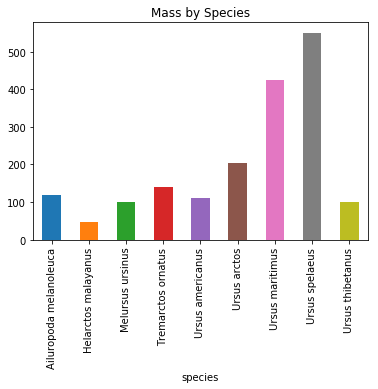

In [18]:
# make bar chart of mass by species
bears_df.groupby('species')["mass"].describe()['mean'].plot(kind="bar", title="Mass by Species")
# this was accomplished by: 
# grouping by species, then extracting the mass,
# taking the mean mass for each species (although there is only one value per species here, this makes the code applicable to larger datasets),
# and finally plotting a bar chart with the given name

#### Question 1:
The largest bear species is _Ursus spelaeus_, as shown in the graph above.
#### Question 2:
This species is also interesting because it is in the same genus (_Ursus_) as the second-smallest species in this dataset (_Ursus thibetanus_). This genus has a very wide spread of weight in its members!

### Section 9:
Plot molecular weight vs GC-content. 

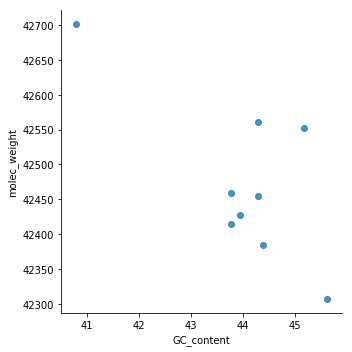

In [19]:
sns.lmplot("GC_content", "molec_weight", data=bears_df, fit_reg=False)

## 9 ##
## Plot a visualization of the molecular weight (y-axis) as a function of GC content (x-axis).

### Section 10:
Save the bears dataframe to a file named "bears_mass_ctb.csv".

In [23]:
bears_df.to_csv("bears_mass_cytb.csv") # use .to_csv() to save the dataframe to a csv file

# .to_csv() is part of Pandas, and is used analogously to pandas.read_csv("filename"), which we learned about in class.
# This command is used to output a dataframe as a .csv file, using the general syntax:
# df.to_csv("output_file_name.csv")

# Sources: 
# Pandas documentation at https://pandas-docs.github.io/pandas-docs-travis/generated/pandas.DataFrame.to_csv.html
# instructional website "Real Python" at https://realpython.com/python-csv/#writing-csv-files-with-pandas

### Section 11: Bonus
Make a function to translate a _template strand_ mitochondrial DNA sequence. Take the input as a Seq object (any alphabet) and output the protein as a Seq object with alphabet IUPACProtein.

Typically, BioPython assumes that a provided DNA sequence is the coding strand, not the template strand, and converts the sequence to RNA or a protein based on this a
ssumption. If the DNA provided were instead the template strand, BioPython would first have to find the reverse complement of this sequence (this would be the coding strand) and then translate that.

Source for information about BioPython's treatment of coding/template strands: BioPython wiki, https://biopython.org/wiki/Seq

In [47]:
def translate_template(template_string): # define a function to take template strand DNA as a Seq object (any alphabet accepted)
    template_seq=Seq(str(template_string), IUPAC.unambiguous_dna) # set alphabet as IUPAC.unambiguous_dna
    coding=template_seq.reverse_complement() # find reverse complement of template (this is coding sequence); method found in BioPython class notes
    aa=coding.translate(to_stop=True, table="Vertebrate Mitochondrial") # translate coding sequence using Vertebrate Mitochondrial table; stop at stop codon
    return(aa) # return translated protein as Seq object with IUPACProtein alphabet.

In [48]:
# test the function with a practice template sequence 
test_template=Seq("CTATTCATGCTTGATTGGATTCAT")
translate_template(test_template)
# I manually found the reverse complement and translated this sequence, 
# using the vertebrate mitochondrial DNA table from Wikipedia, at https://en.wikipedia.org/wiki/Vertebrate_mitochondrial_code#Translation_table

# I expect the resulting protein to be MNPIKHE

Seq('MNPIKHE', IUPACProtein())